In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import csv
from cvrptw import *
import os
import sys
import json

In [4]:
fname = "..\\..\\data\\VRPTW\\solomon_100\\RC201.json"

tlim = 300

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')
solution = model.solve(TimeLimit=tlim)

best_known_solution:     1261.8
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 476 variables, 577 constraints
 ! TimeLimit            = 300
 ! Workers              = 2
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.07s (0.07s extraction + 0.00s propagation)
 !  . Log search space  : 2869.6 (before), 2869.6 (after)
 !  . Memory usage      : 9.5 MB (before), 9.5 MB (after)
 ! Using parallel search with 2 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        476                 -
 + New bound is 418.4999
                        0        376                 -
 + New bound is 568.3999
                        0        376    1            -
 + New bound is 600.3805
 *      3833.900      102  0.15s        1      (gap is 84.34%)
 I Used: 15
 *      3588.000     

In [4]:
solution.get_solver_output()

AttributeError: 'CpoSolveResult' object has no attribute 'get_solver_output'

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 326 variables, 377 constraints
 ! TimeLimit            = 15
 ! Workers              = 2
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.03s (0.03s extraction + 0.00s propagation)
 !  . Log search space  : 1751.7 (before), 1751.7 (after)
 !  . Memory usage      : 4.0 MB (before), 4.0 MB (after)
 ! Using parallel search with 2 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        326                 -
 + New bound is 179.0999
                        0        226    1   F        -
 + New bound is 221.8972
 *      2326.400       50  0.07s        1      (gap is 90.46%)
 I Used: 10
 *      2296.900      894  0.07s        1      (gap is 90.34%)
 I Used: 11
 *      2278.200     1963  0.09s        1      (gap is 90.2

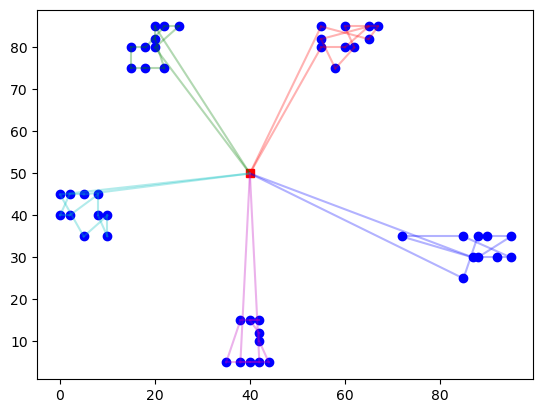

In [27]:
fname = "..\\..\\data\\VRPTW\\solomon_50\\RC201.json"
tlim = 15

instance = Cvrptw()
instance.read_json(fname)
instance.solve(tlim)
instance.visualize_solution()

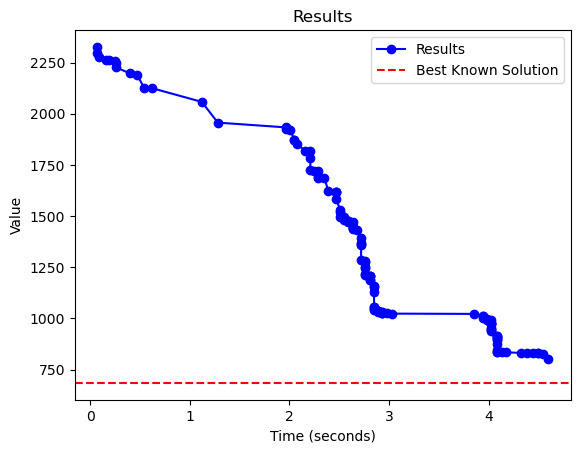

In [28]:
instance.visualize_progress()

In [35]:
instance.save_to_json()

In [28]:
def get_best_known_solution(instance_name, N):
    # Function to retrieve the best known solution based on instance name and N
    return optimal_values.get(instance_name + '.' + str(N), None)

# def convert_data_to_json():
data_folder = '..\\..\\data\\VRPTW\\'  # Specify the folder name where the data files are located
cvrptw_prob = CVRPTWProblem()

for folder_name in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder_name)):
        continue

    N = int(folder_name.split('_')[-1])  # Extract the value of N from the folder name
    folder_path = os.path.join(data_folder, folder_name)

    for filename in os.listdir(folder_path):
        if not filename.endswith('.txt'):
            continue

        instance_name = filename.split('.')[0]  # Extract the instance name from the file name
        instance_path = os.path.join(folder_path, filename)
        cvrptw_prob = CVRPTWProblem()
        cvrptw_prob.read(instance_path)
        instance_data = cvrptw_prob.to_dict()

        # Create the JSON object
        json_obj = {
            'name': 'cvrptw',
            'N': N,
            'best_known_solution': get_best_known_solution(instance_name, N),
            'our_best_solution': '',
            'solutions': [],
            'data': instance_data,
        }

        with open(os.path.join(folder_path, instance_name + '.json'), 'w') as json_file:
            json.dump(json_obj, json_file)
    #     break
    # break
# Save the JSON data to a file




# Call the function to convert the data to JSON
# convert_data_to_json()


In [8]:
# def load_optimal_values(json_data):
optimal_values_file = '..\\..\\data\\VRPTW\\optimals.csv'  # Specify the path to the CSV file
optimal_values = {}

with open(optimal_values_file, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';')

    for row in csv_reader:
        instance_key = row.pop('Problem')  # Remove the instance key from the row
        optimal_values[instance_key] = row

# Call the function to load the optimal values and update the JSON data
# load_optimal_values(json_data)


In [16]:
import re

log = solution.solver_log

# Define the regex pattern
pattern = r"\*\s+(\d+\.\d+)\s+\d+\s+(\d+\.\d+s)"

# Find all matches of numbers and times in the log using the regex pattern
matches = re.findall(pattern, log, re.MULTILINE)

# Convert minutes and hours into seconds and store the results
result = [[float(match[0]), match[1]] for match in matches]
for i in range(len(result)):
    unit = result[i][1][-1]  # Get the last character of the time
    if unit not in ['s', 'm', 'h']:  # If the unit is not minutes or hours
        print("Error: Unknown unit", unit)
    time = float(result[i][1][:-1])  # Get the time without the last character
    if unit == 'm':  # If the unit is minutes
        result[i][1] = time * 60  # Convert minutes to seconds
    elif unit == 'h':  # If the unit is hours
        result[i][1] = time * 3600  # Convert hours to seconds
    else:
        result[i][1] = time  # Otherwise, the unit is seconds


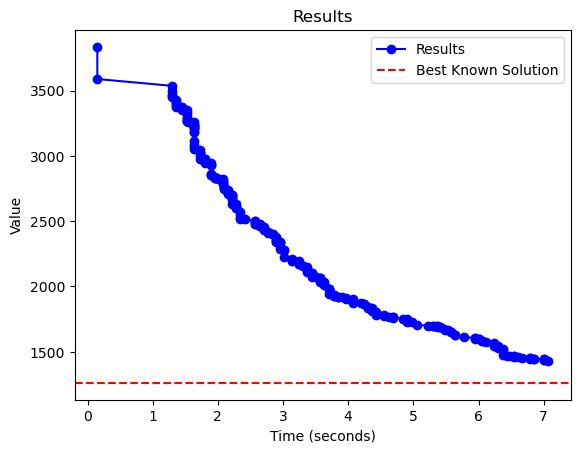

In [25]:
import matplotlib.pyplot as plt

# Assume the result variable contains the processed results

# Extract the number and time values into separate lists
numbers = [entry[0] for entry in result]
times = [entry[1] for entry in result]

best_known_solution = float(instance['best_known_solution']['Distance'])

# Plot the data
plt.plot(times, numbers, 'bo-', label='Results')
plt.axhline(y=best_known_solution, color='r', linestyle='--', label='Best Known Solution')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')
plt.title('Results')
plt.legend()

# plt.ylim(min(times), max(times + [best_known_solution]))

# Display the plot
plt.show()
